In [33]:
import spacy


from pathlib import Path


from spacy.tokens import Doc
from spacy.vocab import Vocab


import numpy as np

from collections import Counter

from tqdm import tqdm

In [4]:

root = Path('../data/sections')

In [35]:
ents_counter = Counter()
ents_vectors = dict()

for path in tqdm(sorted(root.glob('*.spacy'))):
    doc = Doc(Vocab()).from_disk(path)
    for ent in doc.ents:
        ents_counter[ent.text]+=1
        if ent.text not in ents_vectors:
            ents_vectors[ent.text] = ent.vector

100%|██████████| 108/108 [00:16<00:00,  6.55it/s]


In [36]:
ents_counter.most_common(100)

[('Albertine', 1890),
 ('Swann', 1030),
 ('M.\xa0de\xa0Charlus', 831),
 ('Balbec', 661),
 ('Françoise', 644),
 ('Saint-Loup', 639),
 ('Gilberte', 570),
 ('Odette', 547),
 ('Guermantes', 521),
 ('Paris', 501),
 ('Morel', 417),
 ('Mme\xa0Verdurin', 401),
 ('Bloch', 385),
 ('Mme\xa0de\xa0Guermantes', 367),
 ('Combray', 361),
 ('Robert', 301),
 ('Mme\xa0de\xa0Villeparisis', 297),
 ('Andrée', 296),
 ('Bergotte', 283),
 ('Mme\xa0Swann', 271),
 ('Brichot', 269),
 ('Verdurin', 268),
 ('Elstir', 233),
 ('Cottard', 208),
 ('Ah\xa0!', 206),
 ('Jupien', 196),
 ('Mme\xa0', 188),
 ('M.\xa0de\xa0Norpois', 173),
 ('Oriane', 146),
 ('Rachel', 135),
 ('Venise', 133),
 ('M.\xa0Verdurin', 127),
 ('M.\xa0de\xa0Guermantes', 120),
 ('Legrandin', 117),
 ('Berma', 114),
 ('duchesse de Guermantes', 110),
 ('Vinteuil', 109),
 ('Monsieur', 103),
 ('Mlle\xa0Vinteuil', 103),
 ('Charlus', 100),
 ('Mme\xa0de\xa0Cambremer', 96),
 ('Aimé', 94),
 ('princesse de Parme', 93),
 ('Cambremer', 93),
 ('Forcheville', 92),
 ('D

In [37]:
len(ents_vectors)

8528

In [38]:
list(ents_counter) == list(ents_vectors)

True

In [39]:
list(ents_counter)[:100],list(ents_vectors)[:100]

(['RECHERCHE DU TEMPS',
  'Marcel Proust',
  'Web',
  'Marcel Proust\nmarcel-proust.com\n\xa0\n\n',
  'général A',
  'Versailles',
  'Texte',
  'Côté de Chez',
  'Swann',
  'Swann\nPremière',
  'Combray\nI.\nLongtemps',
  'François\xa0',
  'Charles Quint',
  '–\xa0date pour moi d’une ère nouvelle\xa0',
  'Ève',
  'Adam',
  'Si',
  '–\xa0mon corps',
  'Bohême',
  'Sienne',
  'Combray',
  'grands-parents',
  'Mme\xa0de\xa0Saint-Loup',
  'Dieu\xa0!',
  'Tansonville',
  'Débats roses',
  'hirondelle\nde mer',
  'lune',
  'Louis\xa0XVI',
  'le bon ange',
  'Balbec',
  'Paris',
  'Doncières',
  'Venise',
  'Golo',
  'Geneviève de Brabant',
  'Geneviève',
  'Brabant',
  'porte de ma\nchambre',
  'Barbe-Bleue',
  'Françoise',
  '–\xa0à\nun des moments où la révolution',
  'cognac\xa0!',
  'Roussainville-le-Pin',
  'volupté',
  'M.\xa0Swann',
  'grand\nmarronnier',
  'M.\xa0Swann\xa0',
  'Bressant',
  'homme\nexcellent',
  'chambre\nmortuaire',
  'soleil',
  'Ah\xa0!',
  'Amédée\xa0!',
  'incog

In [45]:
embeddings = np.stack(list(ents_vectors.values()))

In [46]:
embeddings.shape

(8528, 96)

In [47]:
import umap

/home/lerner/anaconda3/envs/meerqat/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
model = umap.UMAP(metric='cosine')

In [51]:
model.fit(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [52]:
reduced_embeddings = model.transform(embeddings)

In [53]:
import matplotlib.pyplot as plt

In [59]:
sizes = np.array(list(ents_counter.values()))

In [60]:
sizes.shape

(8528,)

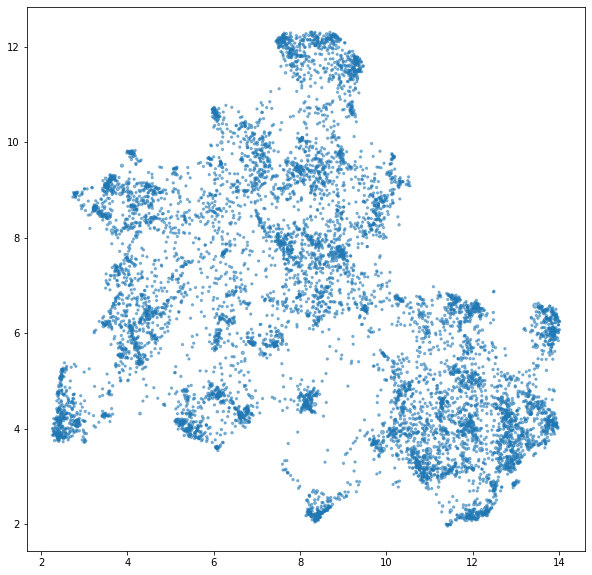

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(reduced_embeddings[:,0],reduced_embeddings[:,1],s=np.sqrt(sizes)+4,alpha=0.5)

In [64]:
import pandas as pd

In [65]:
df = pd.DataFrame(dict(text = list(ents_counter), x = reduced_embeddings[:,0], y=reduced_embeddings[:,1], size=sizes))

In [87]:
df['size']=np.sqrt(sizes)+4

In [88]:
df

,text,x,y,size
0,RECHERCHE DU TEMPS,7.847138,7.561810,5.000000
1,Marcel Proust,10.672096,3.197828,5.414214
2,Web,9.250432,3.116472,5.000000
3,Marcel Proust\nmarcel-proust.com\n \n\n,8.406224,6.152951,5.000000
4,général A,8.806007,6.339206,5.000000
...,...,...,...,...
8523,Heureux\noubli,8.600494,7.502079,5.000000
8524,Les Mille et Une Nuits\npeut-être,10.134216,9.628871,5.000000
8525,« Suis-je,3.907897,6.257226,5.000000
8526,François le Champi !,2.474414,3.873162,5.000000


In [79]:
from bokeh.plotting import figure, output_file, save
from bokeh.models import ColumnDataSource, HoverTool

In [89]:
source = ColumnDataSource(df)

In [90]:
plot_figure = figure(
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)
plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <p>@text</p>
    </div>
</div>
"""))
plot_figure.circle(
    'x',
    'y',
    source=source,
    line_alpha=0.3,
    fill_alpha=0.3,
    size='size'
)

GlyphRenderer(id='1442', ...)

In [91]:
output_file('../data/ents_umap.html')

In [92]:
save(plot_figure)

'/home/lerner/Documents/proust/data/ents_umap.html'